<a href="https://colab.research.google.com/github/antonFJohansson/Article_collection/blob/master/Perturbed_Model_Validation_A_New_Framework_to_Validate_Model_Relevance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-------------------------------------------------------
The idea of the article is to select a model by injecting noise into the labels of the training data. It is based on the idea that a model that overfits the training data should also be able to overfit the new noisy labels, while a model that underfits the data should get similar performance to before. Thus they propose that we should be able to detect which model that does not overfit or underfit based on the change in training accuracy.

They argue against Cross-Validation by saying that we assume that the holdout set models the underlying data distribution well, but that this does not always hold (where I assume one could find such an example when training on Google Images and Mobile Cell Phone Images). They also argue that different models can have very similar CV-scores, making it difficult to discrent between them and find which one to use.

They also argue against VC-dimension or Rademacher complexity since these can be very difficult to compute (even though they theoretically gives upper bounds on the generalization error). VC-dimension and Rademacher does not both take into account the data distribution and the label distribution, something that their method does. 

**Thoughts**

I think the idea is interesting but maybe easiest to implement for simple models and not neural networks since some of them can fit the data no matter how we flip the labels but are still able to generalize well. The article is not very well written to me unfortunately. And if I have understood everything correctly then I do not see evidence of their method working when applying it to a toy problem.

------------------------------------------------------------
The VC-dimension is a measure of the capacity of a hypothesis class (function space). On Wikipedia they have two definitions of the VC-dimension

**VC-dimension of a set family**

Let $H$ be a family of sets and let $C$ be a set. Their intersection is defined as
$$H \cap C = \{h \cap C|h \in H\}$$
We say that $C$ is shattered by $H$ if $H \cap C$ contains all subsets of $C$, i.e, $H \cap C = 2^{|C|}$. The way we interpret this is that in a binary classification problem, no matter what the labeling of the points are: we can always find a function in our hypothesis class which can classify the labeling with 100% accuracy. The VC-dimension is the largest cardinality of $C$ for which there exists a set such that this holds.

**VC-dimension of a classification model**

A classification model $f$ with some parameters $\theta$ is said to shatter a set of datapoints $\{x_i\}i=1^n$, if for all labelings of these points, there exists a $\theta$ such that $f$ correctly classifies all the points. The VC-dimension is once again the cardinality of the largest set such that this holds. [Q1]

A few examples would be
* A constant classifier: This classifier has VC-dimension 0 since it will always give the same result. But if we label a single point differently then we need to get different answers.
* A classifier with a single parameter $\theta$ such that if $x>\theta$ then the point is classified as 1 and 0 otherwise. The VC-dimension of this classifier is 1 since it can shatter a set with 1 point but not 2 point since if the smaller of the points is labelled 1 then the larger of the points need to be labelled 1 as well, indicating that we cannot shatter the set.
* A linear classifier has VC-dimension 3 because one can show that there is no way to arrange 4 points such that they can be shattered by a line.
* $\sin (\theta x)$ has infinite VC-dimension. This does not necessarily mean that it is a good classifier, just that there exists such a data set that can be shattered.

The VC-dimension can be used to get probabilistic bounds on the generalization error when new data points are drawn according to the data distribution.

##Questions/Answers
* [Q1]: It seems a bit strange that we only require that we find one set such that this holds. It seems one should be able to construct sets then which are almost trivial just to increase the VC-dimension.

----------------------------------------------------------------
The Rademacher complexity is another way to measure the richness (maybe capacity?) of a class of functions (hypothesis class) **with respect to a probability distribution**. It is defined in steps, first we define the Rademacher complexity of a set as:

Given a set $A \in \mathbb{R}^n$, the Rademacher complexity is defined as follows
$$Rad(A) = \frac{1}{m}\mathbb{E}_{\sigma}\bigg[\sup_{a \in A} \sum_{i=1}^n \sigma_ia_i\bigg]$$
where $\sigma_1,\sigma_2,...,\sigma_n$ are independent random variables drawn with the Rademacher distribution given as $P(\sigma_i=1)=P(\sigma_i=-1) = 1/2$ and $a = (a_1,a_2,...,a_n)$

The Rademacher complexity of a function class is given as:

Given a sample $S = (z_1,z_2,...,z_n) \in Z^n$, and a class $F$ of real-valued functions defined on a domain space $Z$, the empirical Rademacher complexity of $F$ given $S$ is given as
$$Rad_{S}(F) = \frac{1}{m}\mathbb{E_{\sigma}}\bigg[\sup_{f \in F}\sum_{i=1}^m\sigma_i f(z_i)\bigg]$$
whcih we can write with the previous notation as
$$Rad_S(F) = Rad(F \circ S)$$ where $F \circ S = \{f(z_1, ...,f(z_n))|f\in F\}$. Now let $P$ be a probability distribution over $Z$, the Rademacher complexity of the function class $F$ with respect to the probability distribution $P$ for a sample size of $n$ is
$$Rad_{P,m}(F) = \mathbb{E}_{S\sim P^n}[Rad_S (F)]$$

The goal of these formulas is that we can derive data-dependent bounds on the learnability of function classes, i.e, how easy they are to learn. A function class with a smaller Rademacher complexity should be easier to learn. I guess this has more to do with how easy a function is to learn compared to if it overfits or not maybe. The idea being that if we have a very high capacity function class then the Rademacher complexity will be large, while if we have a constant function the complexity will be 0. And a constant function should in some sense be easy to identify.

The Rademacher complexity can be used to get upper-bounds on the generalization error and there are connections to the VC-dimension.


-----------------------------------------------------------------------------------------
The way they implement their method called PMV (Perturbed Model Validation) is by proceeding with the following steps:
* Inject noise with different degress ( i.e. flip a label with a certain probability)
* Retrain the model and check the decrease in training accuracy

They also fit a linear model to the points given by ($r_i, Acc(S_{r_i})$) where $r_i$ is the label flipping probability and $Acc(S_{r_i})$ is the corresponding training accuracy. They vary $r_i$ from 0 to 0.5. Thus they get a linear line of the training accuracy as a function of the noise degree as
$$\hat{Acc} = kr + \hat{Acc}(S)$$
They see some difference when using this method compared to using cross-validation. 

One issue with their method might be that they do not actually repeat the randomisation of labels it seems like but just do it once. They even complain that this is something which the cross-validation method gives differing results for.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


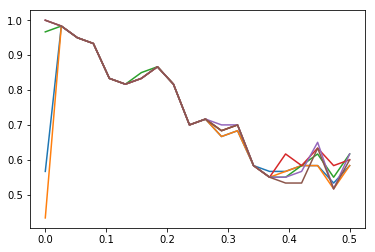

In [78]:
## So we try their method with some simple polynomials here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

x = np.arange(2,5,0.05)
y = -x**3 + 5*x**2-x - 14 + np.random.normal(0,0.2,x.shape[0])
y = 1 / (1+ np.exp(y))
y = y > 0.5
#plt.scatter(x,y)
X1 = np.expand_dims(x,1)
X2 = np.stack((x, x**2), 1)
X3 = np.stack((x, x**2, x**3), 1)
X4 = np.stack((x, x**2, x**3, x**4), 1)
X5 = np.stack((x, x**2, x**3, x**4, x**5), 1)
X6 = np.stack((x, x**2, x**3, x**4, x**5, x**6), 1)


num_steps = 20
r = np.linspace(0,0.5,num_steps)
s = np.zeros((6,num_steps))


for k in range(num_steps):
  
  if k != 0:
    y = np.random.binomial(1,r[k], y.shape[0])
  
  clf1 = LogisticRegression(random_state=0, solver='lbfgs').fit(X1,y)
  s[0,k]=clf1.score(X1,y)

  clf2 = LogisticRegression(random_state=0, solver='lbfgs').fit(X2,y)
  s[1,k]=clf2.score(X2,y)

  clf3 = LogisticRegression(random_state=0, solver='lbfgs').fit(X3,y)
  s[2,k]=clf3.score(X3,y)

  clf4 = LogisticRegression(random_state=0, solver='lbfgs').fit(X4,y)
  s[3,k]=clf4.score(X4,y)

  clf5 = LogisticRegression(random_state=0, solver='lbfgs').fit(X5,y)
  s[4,k]=clf5.score(X5,y)

  clf6 = LogisticRegression(random_state=0, solver='lbfgs').fit(X6,y)
  s[5,k]=clf6.score(X6,y)


for k in range(6):
  
  plt.plot(r, s[k,:])

